<a href="https://colab.research.google.com/github/Aman78695/CIP-DATA-SCIENCE-INTERNSHIP/blob/main/Emai_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/spam_ham_dataset.csv',engine="python",error_bad_lines=False)

<ipython-input-2-65b8d455161f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/spam_ham_dataset.csv',engine="python",error_bad_lines=False)
Skipping line 3003: unexpected end of data


In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
376,4330,spam,"Subject: feelings of guilt , worthlessness , h...",1
504,4993,spam,"Subject: 30 seconds refinance\r\nhello ,\r\nwe...",1
2636,2950,ham,Subject: final final version\r\ni have added s...,0
2783,3210,ham,"Subject: wellhead volumes adjusted - may , 200...",0
1355,1631,ham,Subject: re : wholesale volumes - august\r\nyr...,0


In [4]:
df.shape

(3001, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3001 non-null   int64 
 1   label       3001 non-null   object
 2   text        3001 non-null   object
 3   label_num   3001 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 93.9+ KB


Looking at the data we require only two colunmns 'text' and 'label_num'.

In [6]:
#dropping the unnecessary columns
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [7]:
#missing values
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [8]:
#duplicate rows
df.duplicated().sum()

70

In [9]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

## EDA

In [11]:
df['label_num'].value_counts()

0    2121
1     810
Name: label_num, dtype: int64

The target column is little imbalanced the no of ham(0) is more than spam(1)

<Axes: ylabel='label_num'>

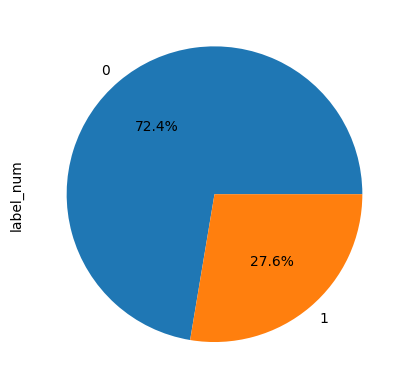

In [12]:
df['label_num'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
#creating a new column which counts the no of character in each text
df['num_of_char']=df['text'].apply(lambda x: len(x))

In [16]:
#creating a new column which counts the num of words in each text
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
#creating new column which counts the length of sentences in each text
df['num_of_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
#using describe method for numerical columns

In [19]:
#for ham
df[df['label_num']==0][['num_of_char','num_of_words','num_of_sent']].describe()

,num_of_char,num_of_words,num_of_sent
count,2121.000000,2121.000000,2121.000000
mean,997.838755,231.464875,11.711928
std,1429.285807,347.502799,28.932493
min,30.000000,4.000000,1.000000
25%,237.000000,52.000000,4.000000
50%,537.000000,127.000000,7.000000
75%,1271.000000,301.000000,14.000000
max,32258.000000,8863.000000,1204.000000


In [20]:
#for spam
df[df['label_num']==1][['num_of_char','num_of_words','num_of_sent']].describe()

,num_of_char,num_of_words,num_of_sent
count,810.000000,810.000000,810.000000
mean,1178.181481,224.002469,16.506173
std,1800.713950,322.691206,31.748752
min,11.000000,2.000000,1.000000
25%,312.750000,60.000000,4.000000
50%,581.500000,117.000000,9.000000
75%,1178.250000,231.250000,18.000000
max,22073.000000,2732.000000,693.000000





**For the ham emails:**

The mean number of characters is approximately 992, with a standard deviation of 1410.


The mean number of words is around 230, with a standard deviation of 342.


The mean number of sentences is approximately 11.6, with a standard deviation of 27.2.


The minimum values for the number of characters, words, and sentences are 18, 3, and 1, respectively.


The 25th percentile values indicate that 25% of the ham emails have less than 235 characters, 51 words, and 4 sentences.


The median (50th percentile) values are 537 characters, 125 words, and 6 sentences.


The 75th percentile values indicate that 75% of the ham emails have less than 1266 characters, 299 words, and 13 sentences.


The maximum values are 32258 characters, 8863 words, and 1204 sentences.


**For the spam emails:**

The mean number of characters is approximately 1239, with a standard deviation of 1842.


The mean number of words is around 239, with a standard deviation of 345.


The mean number of sentences is approximately 18.0, with a standard deviation of 36.1.


The minimum values for the number of characters, words, and sentences are 11, 2, and 1, respectively.


The 25th percentile values indicate that 25% of the spam emails have less than 315 characters, 60 words, and 4 sentences.


The median (50th percentile) values are 587.5 characters, 119.5 words, and 9 sentences.


The 75th percentile values indicate that 75% of the spam emails have less than 1237 characters, 242 words, and 19 sentences.


The maximum values are 22073 characters, 3013 words, and 693 sentences.

In [21]:
#plotting histogram for ham and spam 

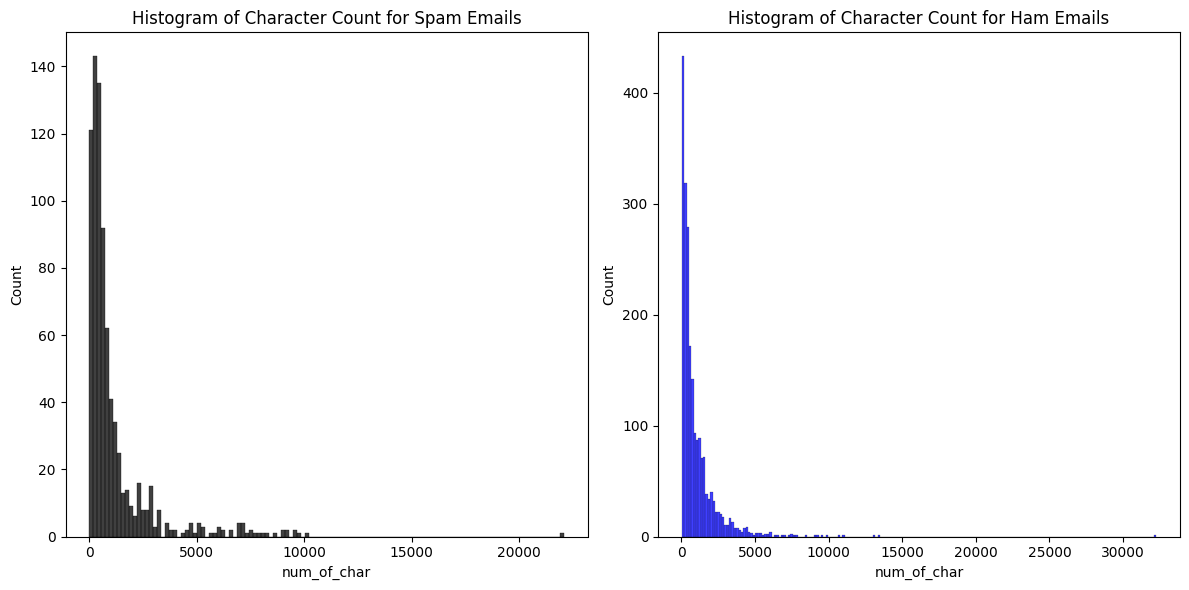

In [22]:


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for spam emails
sns.histplot(df[df['label_num']==1]['num_of_char'], color='black', ax=axes[0])
axes[0].set_title('Histogram of Character Count for Spam Emails')

# Plot histogram for ham emails
sns.histplot(df[df['label_num']==0]['num_of_char'], color='blue', ax=axes[1])
axes[1].set_title('Histogram of Character Count for Ham Emails')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


We can clearly see the num of characters in spam email is more than ham.

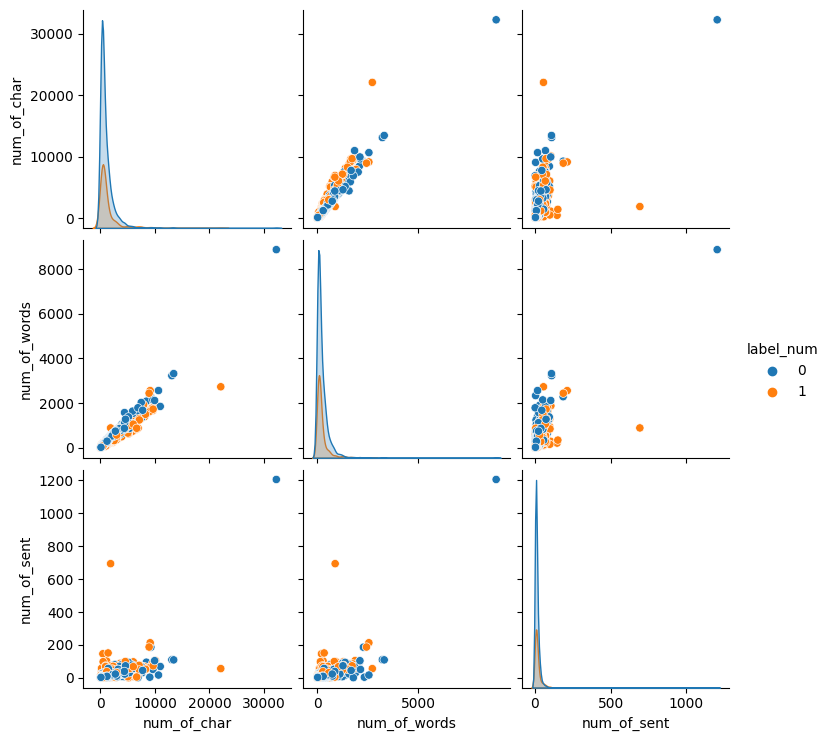

In [23]:
sns.pairplot(df,hue='label_num')

We can clearly see the num of characters,words and sentences in spam email is more than ham.

##Data Preprocessing

In [24]:
#converting in lower character
df['text']=df['text'].str.lower()

In [25]:
#word tokenization
df['text']=df['text'].apply(lambda x:nltk.word_tokenize(x))

In [26]:
df.head()

,text,label_num,num_of_char,num_of_words,num_of_sent
0,"[subject, :, enron, methanol, ;, meter, #, :, ...",0,327,68,3
1,"[subject, :, hpl, nom, for, january, 9, ,, 200...",0,97,24,3
2,"[subject, :, neon, retreat, ho, ho, ho, ,, we,...",0,2524,551,24
3,"[subject, :, photoshop, ,, windows, ,, office,...",1,414,49,3
4,"[subject, :, re, :, indian, springs, this, dea...",0,336,71,3


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
Stpwrds=stopwords.words('english')

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#removing stopwords 
df['text']=df['text'].apply(lambda x:[word for word in x if word not in Stpwrds])

In [31]:
df.head()

,text,label_num,num_of_char,num_of_words,num_of_sent
0,"[subject, :, enron, methanol, ;, meter, #, :, ...",0,327,68,3
1,"[subject, :, hpl, nom, january, 9, ,, 2001, (,...",0,97,24,3
2,"[subject, :, neon, retreat, ho, ho, ho, ,, ', ...",0,2524,551,24
3,"[subject, :, photoshop, ,, windows, ,, office,...",1,414,49,3
4,"[subject, :, :, indian, springs, deal, book, t...",0,336,71,3


In [32]:
#removing punctuation
df['text']=df['text'].apply(lambda x:[word for word in x if word not in string.punctuation])


In [33]:
df.head()

,text,label_num,num_of_char,num_of_words,num_of_sent
0,"[subject, enron, methanol, meter, 988291, foll...",0,327,68,3
1,"[subject, hpl, nom, january, 9, 2001, see, att...",0,97,24,3
2,"[subject, neon, retreat, ho, ho, ho, around, w...",0,2524,551,24
3,"[subject, photoshop, windows, office, cheap, m...",1,414,49,3
4,"[subject, indian, springs, deal, book, teco, p...",0,336,71,3


In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
from nltk.stem import WordNetLemmatizer
lematizer=WordNetLemmatizer()

In [36]:
#lemmatzation
df['text']=df['text'].apply(lambda x:[lematizer.lemmatize(word) for word in x ])

In [37]:
df.head()

,text,label_num,num_of_char,num_of_words,num_of_sent
0,"[subject, enron, methanol, meter, 988291, foll...",0,327,68,3
1,"[subject, hpl, nom, january, 9, 2001, see, att...",0,97,24,3
2,"[subject, neon, retreat, ho, ho, ho, around, w...",0,2524,551,24
3,"[subject, photoshop, window, office, cheap, ma...",1,414,49,3
4,"[subject, indian, spring, deal, book, teco, pv...",0,336,71,3


In [38]:
#converting list of words into strings
df['text']=df['text'].apply(lambda x:" ".join(x))


In [39]:
df.head()

,text,label_num,num_of_char,num_of_words,num_of_sent
0,subject enron methanol meter 988291 follow not...,0,327,68,3
1,subject hpl nom january 9 2001 see attached fi...,0,97,24,3
2,subject neon retreat ho ho ho around wonderful...,0,2524,551,24
3,subject photoshop window office cheap main tre...,1,414,49,3
4,subject indian spring deal book teco pvr reven...,0,336,71,3


# Using **TextHero** for furthur preprocessing

In [40]:
!pip install git+https://github.com/jbesomi/texthero.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jbesomi/texthero.git to /tmp/pip-req-build-edt6kh1k
  Running command git clone --filter=blob:none --quiet https://github.com/jbesomi/texthero.git /tmp/pip-req-build-edt6kh1k
  Resolved https://github.com/jbesomi/texthero.git to commit 25728bb0670e6410c76f2a9bbe6f1dba9f54fa67
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 22.8 MB/s eta 0:00:00
  Created wheel for texthero: filename=texthero-1.0.9-py3-none-any.whl size=42817 sha256=1703a0e36ee49ed12d6ef85705ea27227e24a12c62387d824de4b495eb9ec169
  Stored in directory: /tmp/pip-ephem-wheel-cache-y3x7i0hg/wheels/1e/cd/84/5fe6b6aadb5a1534f072c5e00633a7bd1c57454a9b5b196cb6
Successfully built texthero
  Attemp

In [41]:
import texthero as hero

/usr/local/lib/python3.10/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (3.5.0) requires spaCy v3.5 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [42]:
df['text']=df['text'].pipe(hero.clean)

/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)


In [43]:
df['text'][0]

'subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose'

##WordCloud

In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
#wordcloud for spam
spam_wc=wc.generate(df[df['label_num']==1]['text'].str.cat(sep=" "))

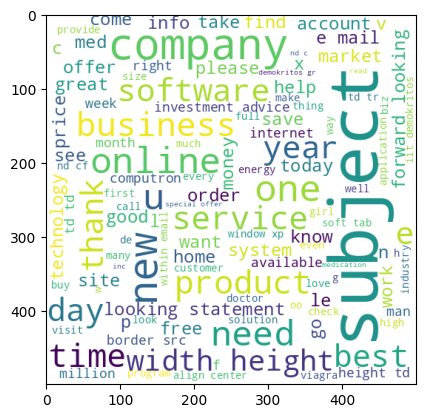

In [46]:
plt.imshow(spam_wc)

In [47]:
#wordcloud for ham
ham_wc=wc.generate(df[df['label_num']==0]['text'].str.cat(sep=" "))

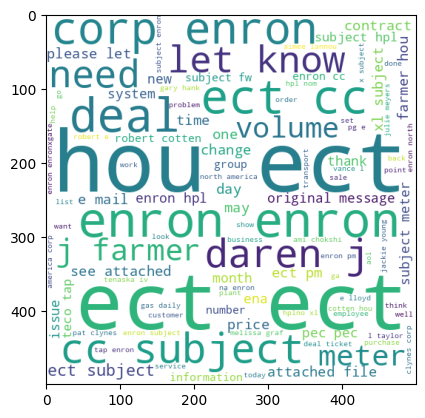

In [48]:
plt.imshow(ham_wc)

#Modelling

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [50]:
X=df['text']

In [51]:
y=df['label_num'].values

In [52]:
X

0       subject enron methanol meter follow note gave ...
1       subject hpl nom january see attached file hpln...
2       subject neon retreat ho ho ho around wonderful...
3       subject photoshop window office cheap main tre...
4       subject indian spring deal book teco pvr reven...
                              ...                        
2996    subject evergreen deal gtc firm expire contrac...
2997    subject hi agaain hello welcome pharm laryngol...
2998    subject july noms daren please see volume acti...
2999    subject meter karen sherlyn gary placed daren ...
3000    subject enron hpl actuals november teco tap en...
Name: text, Length: 2931, dtype: object

#converting text into vectors

In [53]:
X_vectorized=tfidf.fit_transform(X).toarray()

In [54]:
X_vectorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Splitting the datasets and applying different models

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [58]:
#making objects of different classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [59]:
#making dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [60]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [61]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9778534923339012, 0.9192546583850931)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9778534923339012
Precision -  0.9192546583850931


For  KN
Accuracy -  0.9608177172061328
Precision -  0.9770992366412213


For  NB
Accuracy -  0.9114139693356048
Precision -  0.98


For  DT
Accuracy -  0.8637137989778535
Precision -  0.6808510638297872


For  LR
Accuracy -  0.9301533219761499
Precision -  0.7988826815642458


For  RF
Accuracy -  0.9744463373083475
Precision -  0.9079754601226994


For  AdaBoost
Accuracy -  0.9420783645655877
Precision -  0.85625


For  BgC
Accuracy -  0.9403747870528109
Precision -  0.8741721854304636


For  ETC
Accuracy -  0.9761499148211243
Precision -  0.9240506329113924


For  GBDT
Accuracy -  0.9352640545144804
Precision -  0.8716216216216216


For  xgb
Accuracy -  0.9557069846678024
Precision -  0.88125




#based on the provided accuracy and precision values, we can consider the following models:

Support Vector Classifier (SVC): It has a high accuracy of** 0.9778** and a decent precision of** 0.9193**. SVC is known for its ability to handle complex decision boundaries and can work well in various scenarios.

In [65]:
model=SVC(kernel='sigmoid', gamma=1.0)

In [66]:
model.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [67]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [69]:
accuracy_score(y_test,model.predict(X_test))
precision_score(y_test,model.predict(X_test))

0.9192546583850931

#predicton on new emil

In [97]:
pd.DataFrame(['subject enron methanol meter follow note gave monday preliminary'])[0].pipe(hero.clean)

/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/usr/local/lib/python3.10/dist-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)


0    subject enron methanol meter follow note gave ...
Name: 0, dtype: object

In [72]:
X_clean='subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose'

In [86]:
X_numeric=tfidf.transform([X_clean]).toarray()

In [87]:
X_numeric

array([[0., 0., 0., ..., 0., 0., 0.]])

In [88]:
model.predict(X_numeric)

array([0])

#pickling

In [89]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))